In [69]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import seaborn as sns

In [70]:
df_40K = pd.read_csv('40K_100X.txt', header=None) * 10**9
df_20K = pd.read_csv('20K_100X.txt', header=None) * 10**9
df_10K = pd.read_csv('10K_100X.txt', header=None) * 10**9
df_5K = pd.read_csv('5K_100X.txt', header=None) * 10**9
df_25K = pd.read_csv('2.5K_100X.txt', header=None) * 10**9

df_25K= df_25K[df_25K > 1]
df_5K= df_5K[df_5K > 2]
df_10K= df_10K[df_10K > 3]
df_20K= df_20K[df_20K > 3]
df_40K= df_40K[df_40K > 3]

In [71]:
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

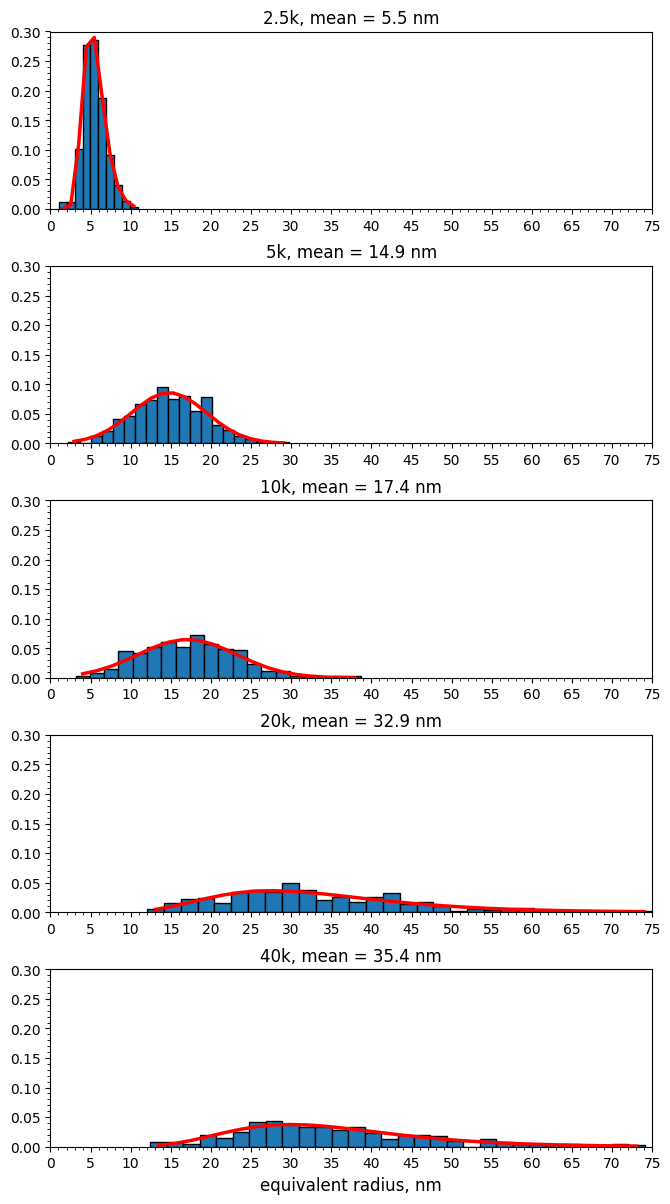

In [72]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize = [7,12])
fig.tight_layout(pad=2)

for i in range(len(ax)):
    ax[i].set_xlim([0, 75])
    ax[i].set_ylim([0, 0.3])
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(0.01))


ax[0].set_title(f'2.5k, mean = {np.mean(df_25K):,.1f} nm')
counts, bins, _ = ax[0].hist(df_25K, bins=10, density=True, edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
ax[0].plot(bin_centers, log_norm(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)

ax[1].set_title(f'5k, mean = {np.mean(df_5K):,.1f} nm')
counts, bins, _ = ax[1].hist(df_5K, bins=20, density=True, edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[0, 1])
ax[1].plot(bin_centers, gaussian(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)


ax[2].set_title(f'10k, mean = {np.mean(df_10K):,.1f} nm')
counts, bins, _ = ax[2].hist(df_10K, bins=20, density=True, edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[0, 1])
ax[2].plot(bin_centers, gaussian(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)

ax[3].set_title(f'20k, mean = {np.mean(df_20K):,.1f} nm')
counts, bins, _ = ax[3].hist(df_20K, bins=30, density=True, edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
ax[3].plot(bin_centers, log_norm(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)

ax[4].set_title(f'40k, mean = {np.mean(df_40K):,.1f} nm')
ax[4].set_xlabel('equivalent radius, nm', size = 12)
counts, bins, _ = ax[4].hist(df_40K, bins=30, density=True, edgecolor = 'black')
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
ax[4].plot(bin_centers, log_norm(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)

#plt.savefig('size_distr.png', bbox_inches = 'tight', dpi = 300)


{'whiskers': [<matplotlib.lines.Line2D at 0x2d7545f2510>,
 'caps': [<matplotlib.lines.Line2D at 0x2d7545f3990>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d7545d6b90>],
 'medians': [<matplotlib.lines.Line2D at 0x2d754600910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d754601250>],
 'means': []}

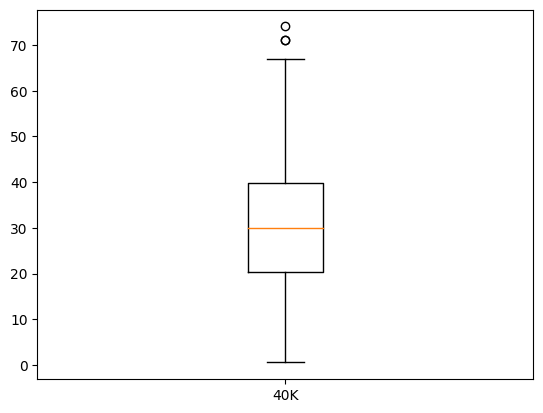

In [77]:
df_40K = pd.read_csv('40K_100X.txt', header=None) * 10**9
df_20K = pd.read_csv('20K_100X.txt', header=None) * 10**9
df_10K = pd.read_csv('10K_100X.txt', header=None) * 10**9
df_5K = pd.read_csv('5K_100X.txt', header=None) * 10**9
df_25K = pd.read_csv('2.5K_100X.txt', header=None) * 10**9

ticks = ['2.5K', '5K', '10K', '20K']
pulses = [2500, 5000, 10000, 20000, 40000]
data = [df_25K,df_5K, df_10K, df_20K, df_40K]

fig, ax = plt.subplots()
ax.boxplot(df_40K, labels = ['40K'])

#ax.set_xtickslabels('40')



